In [18]:
%matplotlib inline

import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import itertools

In [4]:
!ls experiments/lr*

experiments/lr-.00001-seed-1:
2019-03-21-06-07-25

experiments/lr-.00001-seed-100:
2019-03-21-06-07-36

experiments/lr-.00001-seed-200:
2019-03-21-06-07-47

experiments/lr-.0001-seed-1:
2019-03-15-23-33-54

experiments/lr-.0001-seed-100:
2019-03-15-23-34-15

experiments/lr-.0001-seed-200:
2019-03-15-23-34-35

experiments/lr-.001-cr-.3-seed-1:
2019-03-18-08-11-46

experiments/lr-.001-cr-.3-seed-100:
2019-03-18-08-11-56

experiments/lr-.001-cr-.3-seed-200:
2019-03-18-08-12-07

experiments/lr-.001-crflip-seed-1:
2019-03-19-07-26-34

experiments/lr-.001-crflip-seed-100:
2019-03-19-07-26-55

experiments/lr-.001-crflip-seed-200:
2019-03-19-07-27-16

experiments/lr-{.001}-seed-1:
2019-03-21-01-51-30

experiments/lr-{.001}-seed-100:
2019-03-21-01-51-41

experiments/lr-{.001}-seed-200:
2019-03-21-01-51-51

experiments/lr-.001-vf_coef-1.-seed-1:
2019-03-18-18-22-43

experiments/lr-.001-vf_coef-1.-seed-100:
2019-03-18-18-23-03

experiments/lr-.001-vf_coef-1.-seed-200:
2019-03-18-18-23-24

experim

In [77]:
lrs = ['.001', '.0005', '.0001', '.00001']
seeds = [1, 100, 200]
paths = [glob('./experiments/lr-{}-seed-*/2019-03-21*/progress.csv'.format(lr)) for lr in lrs]

In [78]:
paths

[['./experiments/lr-.001-seed-1/2019-03-21-01-51-30/progress.csv',
  './experiments/lr-.001-seed-200/2019-03-21-01-51-51/progress.csv',
  './experiments/lr-.001-seed-100/2019-03-21-01-51-41/progress.csv'],
 ['./experiments/lr-.0005-seed-1/2019-03-21-04-31-18/progress.csv',
  './experiments/lr-.0005-seed-200/2019-03-21-04-31-18/progress.csv',
  './experiments/lr-.0005-seed-100/2019-03-21-04-31-18/progress.csv'],
 ['./experiments/lr-.0001-seed-1/2019-03-21-04-47-20/progress.csv',
  './experiments/lr-.0001-seed-100/2019-03-21-04-47-20/progress.csv',
  './experiments/lr-.0001-seed-200/2019-03-21-04-47-26/progress.csv'],
 ['./experiments/lr-.00001-seed-1/2019-03-21-06-07-25/progress.csv',
  './experiments/lr-.00001-seed-100/2019-03-21-06-07-36/progress.csv',
  './experiments/lr-.00001-seed-200/2019-03-21-06-07-47/progress.csv']]

In [79]:
dfs = [[pd.read_csv(p)[:25] for p in path] for path in paths]
[[len(df.columns) for df in df1] for df1 in dfs]

[[13, 13, 13], [13, 13, 13], [13, 13, 13], [13, 13, 13]]

In [83]:
dfs = [[pd.read_csv(p)[:40] for p in path] for path in paths]

for j, lr in enumerate(lrs):
    for i, seed in enumerate(seeds):
        dfs[j][i]['seed'] = seed
        dfs[j][i]['lr'] = float(lr)
        dfs[j][i]['update_step'] = dfs[j][i].index.values
df = pd.concat([pd.concat(df) for df in dfs])

In [81]:
df.lr.unique()

array([1.e-03, 5.e-04, 1.e-04, 1.e-05])

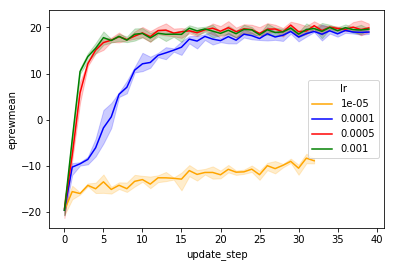

In [84]:
sns.lineplot(x=df.update_step, y=df.eprewmean, hue=df.lr, palette=["orange", "b", "r", "g"], data=df)
plt.show()